In [1]:
# import sll necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
sns.set()

In [2]:
# User data collection
user_column_names = ['user_id', 'gender', 'age', 'occupation', 'zip']
userData = pd.read_csv('../MovielensData/users.dat', names = user_column_names, sep='::', engine='python')

In [3]:
# first five records of user
userData.head()

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [4]:
# Rating data collection
rating_column_names = ['user_id','movie_id', 'rating', 'timestamp']
ratingData = pd.read_csv('../MovielensData/ratings.dat', names = rating_column_names, sep='::', engine='python')

In [5]:
# first five records of ratings
ratingData.head()

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [6]:
# Movie data collection
movie_column_names = ['movie_id', 'title', 'genres']
moviesData = pd.read_csv('../MovielensData/movies.dat', names = movie_column_names, sep='::', engine='python')

In [7]:
# first five records of movie
moviesData.head()

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [8]:
# Create a new dataset with the following columns MovieID Title UserID Age Gender Occupation Rating.
#userAndRatingData = pd.merge(userData, ratingData, on='user_id')
#data = pd.merge(userAndRatingData, moviesData, on='movie_id')

# we can merge this in one line also
data = pd.merge(pd.merge(userData, ratingData, on='user_id'), moviesData, on='movie_id')

In [9]:
# first five values of merged data
data.head()

,user_id,gender,age,occupation,zip,movie_id,rating,timestamp,title,genres
0,1,F,1,10,48067,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,M,56,16,70072,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,M,25,12,32793,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,M,25,7,22903,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,M,50,1,95350,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama


In [10]:
# get the shape of the data
data.shape

(1000209, 10)

In [11]:
# User age distribution, based on each age how many movies reviewed
ageDestributionCount = pd.DataFrame(data.groupby('age')['rating'].count())

In [12]:
ageDestributionCount.head(len(ageDestributionCount))

,rating
age,
1,27211
18,183536
25,395556
35,199003
45,83633
50,72490
56,38780


In [13]:
ageDestributionMean = pd.DataFrame(data.groupby('age')['rating'].mean())

In [14]:
ageDestributionMean.head(len(ageDestributionMean))

,rating
age,
1,3.549520
18,3.507573
25,3.545235
35,3.618162
45,3.638062
50,3.714512
56,3.766632


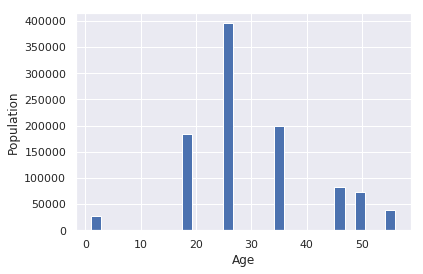

In [102]:
# Age distribution
data['age'].hist(bins=30)
plt.xlabel('Age') 
plt.ylabel('Population')
plt.show()

In [15]:
# User rating of the movie “Toy Story”
dataWithToyStory = data[data.title.str.contains('Toy Story', regex= True)]

In [16]:
# Toy story movie ratings
toyStoryMovieRatingsCount = dataWithToyStory['rating'].count()

In [20]:
print(toyStoryMovieRatingsCount)

3662


In [29]:
groupBymovieRating = pd.DataFrame(data.groupby('title')['rating'].count())

In [40]:
# Top 25 movies by viewership rating
groupBymovieRating.sort_values(by=['rating'], ascending=False)[:25]

,rating
title,
American Beauty (1999),3428
Star Wars: Episode IV - A New Hope (1977),2991
Star Wars: Episode V - The Empire Strikes Back (1980),2990
Star Wars: Episode VI - Return of the Jedi (1983),2883
Jurassic Park (1993),2672
Saving Private Ryan (1998),2653
Terminator 2: Judgment Day (1991),2649
"Matrix, The (1999)",2590
Back to the Future (1985),2583


In [46]:
# Movies reviewed by 2696 user id
user2696Data = data[data['user_id'] == 2696]

In [50]:
user2696Data[['user_id', 'title', 'rating', 'genres']]

,user_id,title,rating,genres
24345,2696,Back to the Future (1985),2,Comedy|Sci-Fi
29848,2696,E.T. the Extra-Terrestrial (1982),3,Children's|Drama|Fantasy|Sci-Fi
244232,2696,L.A. Confidential (1997),4,Crime|Film-Noir|Mystery|Thriller
250014,2696,Lone Star (1996),5,Drama|Mystery
273633,2696,JFK (1991),1,Drama|Mystery
277808,2696,"Talented Mr. Ripley, The (1999)",4,Drama|Mystery|Thriller
371178,2696,Midnight in the Garden of Good and Evil (1997),4,Comedy|Crime|Drama|Mystery
377250,2696,Cop Land (1997),3,Crime|Drama|Mystery
598042,2696,Palmetto (1998),4,Film-Noir|Mystery|Thriller
603189,2696,"Perfect Murder, A (1998)",4,Mystery|Thriller


In [55]:
# Total sum of rating done by user 2696
#user2696Data['rating'].sum()

#user2696Data.shape

# Total movies count done by user 2696
user2696Data['title'].count()

20

# Feature Engineering

In [80]:
# Unique genres data
splittedData = data.genres.str.split("|").to_list()

In [82]:
uniqueGenresList = ()
for item in splittedData:
    uniqueGenresList = list(set(uniqueGenresList) | set(item))
print(uniqueGenresList)    

['Documentary', 'Mystery', 'Horror', 'Action', 'Fantasy', 'Crime', 'Drama', 'Animation', "Children's", 'Adventure', 'Comedy', 'Romance', 'Musical', 'War', 'Thriller', 'Western', 'Film-Noir', 'Sci-Fi']


In [76]:
# unique genres count
print(len(uniqueGenresList))

18


In [83]:
# sort the list of strings
uniqueGenresList.sort()

In [85]:
print(uniqueGenresList)

['Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']


In [86]:
genresData = data['genres'].str.get_dummies('|')
genresData.head()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [87]:
data.shape

(1000209, 10)

In [90]:
# Create a separate column for each genre category with a one-hot encoding ( 1 and 0) whether or not the movie belongs to that genre.
dataWithgendummyData = data.join(data.pop('genres').str.get_dummies('|'))

In [91]:
dataWithgendummyData.shape

(1000209, 27)

In [92]:
# User rating of the movie “Toy Story” with dummy data
dataWithToyStoryD = dataWithgendummyData[dataWithgendummyData.title.str.contains('Toy Story', regex= True)]

In [94]:
toyStoryMovieRatingsCountD = dataWithToyStoryD['rating'].count()

In [95]:
# Determine the features affecting the ratings of any particular movie. 
# Didn't noticed any difference in rating count after implimenting dummies data for genres column
if toyStoryMovieRatingsCount == toyStoryMovieRatingsCountD:
    print("ratings didn't effected after genres data")

ratings didn't effected after genres data
